## Исследование данных о российском кинопрокате

Описание проекта:


В данном проекте проводится изучение рынка российского кинопроката и выявление текущих трендов.Попробую дать овтет на вопрос:  насколько фильмы с государственной поддержкой интересны зрителю. 
Данные взяты с портала открытах данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 



**Описание данных**

- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.


имеются два датасета: первый - это данные о прокатных удостоверениях, второй - данные о прокате в российских кинотеатрфх

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None) 
df = pd.read_csv('mkrf_movies.csv')
df2 = pd.read_csv('mkrf_shows.csv')
display(df.head())
display(df2.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [3]:
df.info()
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

переведем в тип целых чисел(как во втором датафрейме) столбец из первого датафрейма:

In [4]:
#df['puNumber'] = df['puNumber'].astype('int') найдена ошибка

In [5]:
df.query('puNumber == "нет"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Получили ошибку и посмотрели что это за строка. Она единственная, и в ней почти нет никакой информации, соединить датафреймы без номера прокатного удостоверения мы не сможем, поэтому удалим эту строку и переведем в другой тип:

In [6]:
df = df.query('puNumber != "нет"') # удалим эту строку
df['puNumber'] = df['puNumber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

**Теперь соединим таблицы:**

In [7]:
df = df.merge(df2, on = 'puNumber', how = 'left') # склеим две таблицы

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

все выглядит отлично

# Предобработка данных

In [9]:
df = df.rename(columns={'puNumber' : 'pu_number'}) # переименуем стобец

In [10]:
display(df.head())
df.info()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Следует преобразовать: show_start_date в временной тип, ratings в тип вещественных чисел

In [11]:
# df['ratings'] = df['ratings'].astype('float')  здесь получаем ошибку из-за разного типа написания рейтинга: в процентах и 
# вещественным числом. Далее Напишем функцию, чтобы это исправить.

df['show_start_date'] = pd.to_datetime(df['show_start_date']).dt.tz_convert(None) # Переведем в время в правильный тип
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [12]:
df['ratings'].unique() # функция для привидения рейтинга в один тип 
def rat(r):
    if type(r) == str:
        if r[2] == '%':
            return int(r[0:2]) / 10
    return r 
df['ratings'] = df['ratings'].apply(rat)    
df['ratings'].unique()     

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', 9.9, '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', 2.8, '3.7', '1.4', '3.1', 9.7, '3.5',
       '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', 8.3,
       6.4, 9.1, 9.4, 6.2, 7.9, 9.0, 1.9, 8.8, '1.0', 8.9, '1.3', '1.9',
       '1.8', '1.2', '1.7', '9.0', 9.8, '8.9', '9.1'], dtype=object)

In [13]:
df['ratings'] = df['ratings'].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   pu_number              7485 non-null   int32         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Теперь все в порядке

## Изучим пропуски 

In [15]:
print(df.shape)
df.isna().sum()

(7485, 16)


title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Столбцы с типом вида object понятно, что ничем заменить не получится. В refundable_support, nonrefundable_support, budget, box_office слишком много ппропусков, ничем заменить их не получится. Можно посмотреть на рейтинги фильмов, возможно найдем чем можно заменить.

count    6519.000000
mean        6.488173
std         1.114638
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.900000
Name: ratings, dtype: float64
0.12905811623246494


,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
pu_number,1.000000,0.010413,-0.030194,-0.019794,0.137539,-0.020413
refundable_support,0.010413,1.000000,0.359622,0.641224,-0.003797,0.312137
nonrefundable_support,-0.030194,0.359622,1.000000,0.594169,0.125646,0.455729
budget,-0.019794,0.641224,0.594169,1.000000,0.093117,0.361325
ratings,0.137539,-0.003797,0.125646,0.093117,1.000000,0.087230
box_office,-0.020413,0.312137,0.455729,0.361325,0.087230,1.000000


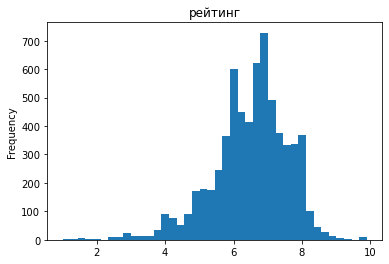

In [16]:
print(df.describe()['ratings'])
print(df.query('ratings.isna()').shape[0] / df.shape[0])
df['ratings'].plot(kind = 'hist', bins = 40, title = 'рейтинг')
df.corr()


Пропуски в столбце рейтинга составляют почти 13 процентов, сразу от всех избавиться не можем. Корреляции с другимим столбцами тоже не замечено. Распределенеи нормальное, выбросов нет. Не могу чем-то заменить пропуски в данномстолбце.

In [17]:
df.query('film_studio.isna()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6484,До и После,112014418,2018-12-05 12:00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6496,Мой папа Чингисхан,112014918,2018-12-06 12:00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Чего-то общего в этих данных не нашел, а каждое название искать в интернете и находить студио займет слишком много времени, оставим так.

In [18]:
df.query('production_country.isna()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [19]:
df.loc[df['pu_number'] == 111001216 , 'production_country'] = 'Россия' # нашел по названиям в интернете и определил страну
df.loc[df['pu_number'] == 214000410 , 'production_country'] = 'Россия' 

In [20]:
df.query('director.isna()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


Сходств никаких нет, оствавим так. 

## Изучим дубликаты

In [21]:
df.duplicated().sum() # пока дубликатов нет

0

Дубликаты могли появится из-за названий фильмов, например есть две строки в одной название с буквовй ё, а в другой с буквой е.

In [22]:
col = ['title', 'type','film_studio', 'production_country', 'producer', 'age_restriction', 'genres']
for c in col:
    df[c] = df[c].str.replace('ё','е')




In [23]:
df.duplicated().sum() # все равно нет дубликатов

0

In [24]:
display(df[df['title'].duplicated(keep = False)]) # есть фильмы, которые выходили в прокат несколько раз, причем с разным прокатным удостоверением.
df[df['pu_number'].duplicated(keep = False)] # здесь то же самое 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Ген-ик, Чон Джи-хун, Пэк Кен сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7449,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [25]:
#df = df.drop_duplicates(subset = ['title'], keep = 'first')
#df = df.drop_duplicates(subset = ['pu_number'], keep = 'first')

In [26]:
df.title

0                                   Открытый простор
1                               Особо важное задание
2                                       Особо опасен
3                                       Особо опасен
4                                       Особо опасен
                            ...                     
7480       Сад художника: Американский импрессионизм
7481                                 Звериная ярость
7482       Щенячий патруль: Скорей спешим на помощь!
7483        Машины песенки. Серия "Испанские мотивы"
7484    Машины песенки. Серия "Когда цветут кактусы"
Name: title, Length: 7485, dtype: object

Удалять строки, где названия фильмов повторяются, не надо, видимо просто фильмы выходили на разных платформах(разный номер прокатного удостоверения), поэтому оставим их так и трогать не будем. Дубли в номерах прокатного удостовреения тоже не являются ошибкой, просто несколько фильмов выщли под одним номером на разных площадках, с ними тоже ничего делать не будем и оставим так( причем полность строки не повторяются ). 

##  Изучим категориальные значения

In [27]:
df.type.value_counts()

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

Видим, что некоторые типы содержат пробелы в начале, удалим их сейчас, чтобы сразу проверить на дубликаты все строки после этого.

In [28]:
df['type'] = df['type'].str.strip()
df.type.value_counts()

Художественный                5908
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [29]:
df['title'] = df['title'].str.strip() # на всякий случай
df['film_studio'] = df['film_studio'].str.strip()
df['production_country'] = df['production_country'].str.strip()
df['director'] = df['director'].str.strip()

In [30]:
df.financing_source.value_counts() # интересно, что источники, которые присутсвуют в данных только русские.

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [31]:
for col in df.columns:
    print(df[col].unique())
    print()

['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']

[221048915 111013716 221038416 ... 124010819 124010619 124010719]

['2015-11-27T12:00:00.000000000' '2016-09-13T12:00:00.000000000'
 '2016-10-10T12:00:00.000000000' ... '2019-12-24T12:00:00.000000000'
 '2019-12-28T12:00:00.000000000' '2019-12-30T12:00:00.000000000']

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']

['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 ...
 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента'
 'Никелодеон Анимейшн Студиос, Спин Мастер'
 'Анимаккорд Лтд., ООО С

Найдена проблема: страны могут быть одинаковые, но стоять в разном порядке. Также некоторые написаны через " - ", не которые через "-", и есть просто через заяптую. Напишем функцию, что бы это исправить.

In [32]:
a = [i.split() for i in df['production_country'].unique()]
a

[['США'],
 ['СССР'],
 ['Франция'],
 ['СССР,', 'Венгрия'],
 ['Германия-Великобритания'],
 ['Великобритания', '-', 'Италия'],
 ['Чехословакия'],
 ['США', '-', 'Франция', '-', 'Турция'],
 ['Новая', 'Зеландия'],
 ['Канада', '-', 'Франция', '-', 'Испания'],
 ['США-Германия'],
 ['США', '-', 'Великобритания'],
 ['Великобритания'],
 ['США', '-', 'Германия'],
 ['Франция', '-', 'Мексика', '-', 'США'],
 ['Россия,', 'Казахстан,', 'США'],
 ['СССР,', 'Швеция'],
 ['СССР,', 'Франция,', 'Англия,', 'Куба,', 'ГДР'],
 ['Германия'],
 ['Великобритания-США-Германия-КНР'],
 ['СССР,', 'ЧССР,', 'Западный', 'Берлин,', 'ПНР'],
 ['СССР,', 'Италия'],
 ['Гонконг,', 'КНР'],
 ['США', '-', 'Франция'],
 ['США', '-', 'Япония', '-', 'Франция', '-', 'Великобритания'],
 ['Гонконг', '-', 'Сингапур', '-', 'Таиланд', '-', 'Великобритания'],
 ['США-Канада'],
 ['Франция', '-', 'Италия', '-', 'Великобритания', '-', 'США'],
 ['Франция', '-', 'США'],
 ['Ирландия-Великобритания-Германия'],
 ['Чехия'],
 ['США-Австралия'],
 ['СССР,', 

In [33]:
df['production_country'] = df['production_country'].str.replace('-',',')
df['production_country'] = df['production_country'].str.replace(' , ',',')
df['production_country'] = df['production_country'].str.replace(', ',',')

In [34]:
b = [i for i in df['production_country'].unique()]

df = df.query('production_country != "2019"') # найдено сранное значение в столбце 
b

['США',
 'СССР',
 'Франция',
 'СССР,Венгрия',
 'Германия,Великобритания',
 'Великобритания,Италия',
 'Чехословакия',
 'США,Франция,Турция',
 'Новая Зеландия',
 'Канада,Франция,Испания',
 'США,Германия',
 'США,Великобритания',
 'Великобритания',
 'Франция,Мексика,США',
 'Россия,Казахстан,США',
 'СССР,Швеция',
 'СССР,Франция,Англия,Куба,ГДР',
 'Германия',
 'Великобритания,США,Германия,КНР',
 'СССР,ЧССР,Западный Берлин,ПНР',
 'СССР,Италия',
 'Гонконг,КНР',
 'США,Франция',
 'США,Япония,Франция,Великобритания',
 'Гонконг,Сингапур,Таиланд,Великобритания',
 'США,Канада',
 'Франция,Италия,Великобритания,США',
 'Франция,США',
 'Ирландия,Великобритания,Германия',
 'Чехия',
 'США,Австралия',
 'СССР,Финляндия',
 'США,Франция,Великобритания,Австрия',
 'США,Бельгия',
 'США,Ирландия,Великобритания',
 'Великобритания,США',
 'Люксембург,Нидерланды,Испания,Великобритания,США,Италия',
 'Великобритания,Франция,США',
 'Новая Зеландия,США',
 'США,Великобритания,Чехия',
 'Канада,Франция,Великобритания',
 'Ир

In [35]:
def ssort(m): # функция для одинаковой сортировки значений 
    m1 = m.split(',')
    m2 = sorted(m1)
    k = ''
    for i in range(len(m2)):
        k = k + m2[i] + ','*(i != len(m2) - 1)
    return k

df['production_country_sort'] = df.production_country.apply(ssort)

t = [i for i in df.production_country_sort.unique()]
t

['США',
 'СССР',
 'Франция',
 'Венгрия,СССР',
 'Великобритания,Германия',
 'Великобритания,Италия',
 'Чехословакия',
 'США,Турция,Франция',
 'Новая Зеландия',
 'Испания,Канада,Франция',
 'Германия,США',
 'Великобритания,США',
 'Великобритания',
 'Мексика,США,Франция',
 'Казахстан,Россия,США',
 'СССР,Швеция',
 'Англия,ГДР,Куба,СССР,Франция',
 'Германия',
 'Великобритания,Германия,КНР,США',
 'Западный Берлин,ПНР,СССР,ЧССР',
 'Италия,СССР',
 'Гонконг,КНР',
 'США,Франция',
 'Великобритания,США,Франция,Япония',
 'Великобритания,Гонконг,Сингапур,Таиланд',
 'Канада,США',
 'Великобритания,Италия,США,Франция',
 'Великобритания,Германия,Ирландия',
 'Чехия',
 'Австралия,США',
 'СССР,Финляндия',
 'Австрия,Великобритания,США,Франция',
 'Бельгия,США',
 'Великобритания,Ирландия,США',
 'Великобритания,Испания,Италия,Люксембург,Нидерланды,США',
 'Великобритания,США,Франция',
 'Новая Зеландия,США',
 'Великобритания,США,Чехия',
 'Великобритания,Канада,Франция',
 'Ирландия',
 'Великобритания,Германия,США'

In [36]:
e = [i for i in df.genres.unique()] # посмотрим на жанры фильмов 
e

['боевик,драма,мелодрама',
 'драма,военный',
 'фантастика,боевик,триллер',
 'драма',
 'мелодрама,комедия',
 'мюзикл,мелодрама,комедия',
 'комедия,криминал',
 'боевик,триллер,детектив',
 'боевик,драма,приключения',
 'драма,спорт',
 'триллер,драма,мелодрама',
 'комедия,мелодрама',
 'драма,мелодрама,комедия',
 'драма,мелодрама',
 'драма,история',
 'драма,мелодрама,семейный',
 'комедия,мелодрама,криминал',
 'комедия',
 'боевик,драма,криминал',
 'драма,комедия',
 'ужасы,фантастика,комедия',
 'мультфильм,короткометражка,мелодрама',
 'драма,криминал',
 'мультфильм,фантастика,фэнтези',
 'триллер,драма,криминал',
 'драма,мелодрама,биография',
 'драма,комедия,военный',
 'фантастика,драма,детектив',
 'мюзикл,семейный',
 nan,
 'военный,приключения,драма',
 'документальный,драма',
 'драма,биография,история',
 'боевик,триллер,драма',
 'фэнтези,боевик',
 'боевик,комедия,криминал',
 'мюзикл,комедия,детский',
 'комедия,мелодрама,драма',
 'мультфильм,фэнтези,комедия',
 'комедия,история',
 'мелодрама',
 

In [37]:
print(" " in df.genres) # проверим на наличие пробелов

False


In [38]:
def ssort2(m): # та же функция для жанров 
    if m == m:
        m1 = m.split(',')
        m2 = sorted(m1)
        k = ''
        for i in range(len(m2)):
            k = k + m2[i] + ','*(i != len(m2) - 1)
        return k

df['genres_sort'] = df.genres.apply(ssort2)

t2 = [i for i in df.genres_sort.unique()]
t2

['боевик,драма,мелодрама',
 'военный,драма',
 'боевик,триллер,фантастика',
 'драма',
 'комедия,мелодрама',
 'комедия,мелодрама,мюзикл',
 'комедия,криминал',
 'боевик,детектив,триллер',
 'боевик,драма,приключения',
 'драма,спорт',
 'драма,мелодрама,триллер',
 'драма,комедия,мелодрама',
 'драма,мелодрама',
 'драма,история',
 'драма,мелодрама,семейный',
 'комедия,криминал,мелодрама',
 'комедия',
 'боевик,драма,криминал',
 'драма,комедия',
 'комедия,ужасы,фантастика',
 'короткометражка,мелодрама,мультфильм',
 'драма,криминал',
 'мультфильм,фантастика,фэнтези',
 'драма,криминал,триллер',
 'биография,драма,мелодрама',
 'военный,драма,комедия',
 'детектив,драма,фантастика',
 'мюзикл,семейный',
 None,
 'военный,драма,приключения',
 'документальный,драма',
 'биография,драма,история',
 'боевик,драма,триллер',
 'боевик,фэнтези',
 'боевик,комедия,криминал',
 'детский,комедия,мюзикл',
 'комедия,мультфильм,фэнтези',
 'история,комедия',
 'мелодрама',
 'биография,драма,музыка',
 'драма,мелодрама,фэнте

In [39]:
k = df['production_country_sort'] # посмотрим на уникальные значения
a = []
for i in k:
    op = i.split(',')
    for j in range(len(op)):
        if op[j] not in a:
            a.append(op[j])
print(sorted(a))
 

# пытался написать функцию, но она слишком долго работает, лучше посмотреть глазами
#for i in range(len(a)):   
   # slovo1 = a[i]
   # for q in range(i, len(a)):
    #    slovo2 = a[q]
    #    er = 0
        
      #  if abs(len(slovo1) - len(slovo2)) < 2 and slovo1 != slovo2:
      #      for d in range(min(len(slovo), len(slovo2))):
        #        if slovo[d] != slovo2[d]:
        #            er+=1
      #  if er > 0 and er < 2:
       #     vb.append(slovo)
#print(vb)
#aaa = []
#for r in range(len(vb)):
  #  if vb[r] not in aaa:
   #     aaa.append(vb[r])
#print(aaa)

['', ' Испания', 'CША', 'Австралия', 'Австрия', 'Азербайджан', 'Албания', 'Англия', 'Аргентина', 'Армения', 'Афганистан', 'Багамские острова', 'Бангладеш', 'Бахрейн', 'Беларусь', 'Белоруссия', 'Бельгия', 'Бенльгия', 'Болгария', 'Босния', 'Босния и Герцеговина', 'Бразилия', 'ВНР', 'Великобритания', 'Венгрия', 'Венесуэла', 'Вьетнам', 'ГДР', 'Гаити', 'Германия', 'Германя', 'Герцеговина', 'Голландия', 'Гонконг', 'Греция', 'Грузия', 'Дания', 'Западный Берлин', 'Израиль', 'Изриль', 'Индия', 'Индонезия', 'Иран', 'Ирландия', 'Исландия', 'Испания', 'Италия', 'К;анада', 'КНР', 'Казахстан', 'Каймановы острова', 'Камбоджа', 'Канада', 'Катар', 'Кения', 'Кипр', 'Киргизия', 'Китай', 'Княжество Андорра', 'Колумбия', 'Корея', 'Куба', 'Ланка', 'Латвия', 'Ливан', 'Литва', 'Люксембург', 'Македония', 'Малайзия', 'Мальта', 'Мексика', 'Монако', 'Монголия', 'Н.Зеландия', 'Непал', 'Нидерланды', 'Новая Зеландия', 'Норвегия', 'Норвения', 'ОАЭ', 'Объединенные Арабские Эмираты', 'ПНР', 'Пакистан', 'Палестина', 'Па

In [40]:
def rep(w_name, r_name): # функция для заемны уникальных значений 
    df['production_country'] = df['production_country'].str.replace(w_name, r_name)
    
rep('Белоруссия','Беларусь' )
rep('Бенльгия','Бельгия' )
rep(' Испания','Испания' )
rep('СЩА','США' )
rep('США ','США' )
rep('Изриль','Израиль' )
rep('CША','США' )
rep('Сша','США' )
rep('К;анада','Канада' )
rep('Шри','Ланка' )
rep('Шри-Ланка','Ланка' )
rep('Ланка','Шри-Ланка' )
rep('Ю.Корея','Южная Корея')
rep('Фрация','Франция' )
rep('Франция ','Франция' )
rep('Республика Казахстан','Казахстан' )
rep('Республика Кипр','Кипр' )
rep('Республика Беларусь','Беларусь' )
rep('Республика Армения','Армения' )
rep('Пуэрто Рико','Пуэрто' )
rep('Рико','Пуэрто' )
rep('Пуэрто','Пуэрто Рико' )
rep('Босния и Герцеговина','Босния' )
rep('Герцеговина','Босния' )
rep('Босния','Босния и Герцеговина' )
rep('Германя','Германия' )
rep('Н.Зеландия','Новая Зеландия' )
rep('Норвения','Норвегия' )
rep('ОАЭ','Объединенные Арабские Эмираты' )
rep('Порртугалия','Португалия' )
rep('Республика Корея','Корея' )
rep('Республика Узбекистан','Узбекистан' )
rep('Чешская Республика','Чехия' )

<ipython-input-40-89ad0e795ed9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['production_country'] = df['production_country'].str.replace(w_name, r_name)


Cделаем то же самое с жанрами

In [41]:
k = df['genres_sort']
a = []
for i in k:
    if i is not None:
        op = i.split(',')
        for j in range(len(op)):
            if op[j] not in a:
                a.append(op[j])
print(sorted(a))

['аниме', 'биография', 'боевик', 'вестерн', 'военный', 'детектив', 'детский', 'для взрослых', 'документальный', 'драма', 'история', 'комедия', 'концерт', 'короткометражка', 'криминал', 'мелодрама', 'музыка', 'мультфильм', 'мюзикл', 'новости', 'приключения', 'реальное ТВ', 'семейный', 'спорт', 'триллер', 'ужасы', 'фантастика', 'фильм-нуар', 'фэнтези']


С ними все хорошо, ничего исправлять не будем.

In [42]:
df.duplicated().sum()

0

In [43]:
df.drop('genres_sort', axis=1, inplace = True) # удалим вспомогательные колонки
df.drop('production_country_sort', axis=1, inplace = True)

## Проверим количественные значения

In [44]:
df.query('refundable_support != 0 and budget.isna() == False').head() # в бюджет включены невозвартные стредства
# бюджет составлен не только из фондов, но и других предприятий со стороны режиссера. 
# поэтому бюджет не может быть меньше выдаваемых средств

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.0,100000000.0,220588394.0,Фонд кино,8.5,"драма,военный,история",249166767.7
1986,Елки Лохматые,111023114,2014-12-10 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,26000000.0,30000000.0,80000000.0,Фонд кино,5.0,"семейный,комедия",121225633.8
2004,Снежная Королева 2: Перезаморозка,114000214,2014-11-13 12:00:00,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",«0+» - для любой зрительской аудитории,30000000.0,40000000.0,252489571.0,Фонд кино,6.5,"мультфильм,фэнтези,приключения",313489846.5
2141,Территория,111000515,2015-01-27 12:00:00,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,«12+» - для детей старше 12 лет,30000000.0,30000000.0,500000000.0,Фонд кино,6.8,"детектив,фэнтези,триллер",72578317.4
2287,12 месяцев. Новая сказка,111014414,2014-10-16 12:00:00,Художественный,"ООО ""Киностудия ""Никола-фильм"", ООО ""Инвестмен...",Россия,Д.Елеонский,И.Каленов,«0+» - для любой зрительской аудитории,15000000.0,5000000.0,90120000.0,Фонд кино,3.8,"семейный,фэнтези",32244810.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7484 non-null   object        
 1   pu_number              7484 non-null   int32         
 2   show_start_date        7484 non-null   datetime64[ns]
 3   type                   7484 non-null   object        
 4   film_studio            7466 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7475 non-null   object        
 7   producer               6916 non-null   object        
 8   age_restriction        7484 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

 Бюджет, невозвратные деньги и возвратные по количеству равны, пирчем там, где указан ресурс.

In [46]:
df.query('nonrefundable_support + refundable_support > budget')


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2057,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2471,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2531,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2683,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2873,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3564,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Есть странные строки, где бюджет равен нулю, Заменим их на сумму поддержки.

In [47]:
def f(d):
    if d['budget'] == 0:
        return d['refundable_support'] + d['nonrefundable_support']
    return d['budget']

df['budget'] = df.apply(f, axis = 1)



In [48]:
#(
   # df.query('budget.isna() == False')
   # .pivot_table(index = 'title', values = ['money', 'budget'] )
  #  .plot(kind = 'bar', grid = True, figsize = (160,10), title = '666')

#)


In [49]:
df.query('nonrefundable_support + refundable_support > budget')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Тперь нет странных значений, можем рабоать дальше.

## Добавим новые столбцы

In [50]:
df['year'] = pd.DatetimeIndex(df['show_start_date']).year # новый столбец с годом
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


In [51]:
def f(d):
    return d[0]

df['main_director'] = df['director'].astype(str).str.split(',')
df['main_director'] = df['main_director'].apply(f)

df['main_genre'] = df['genres'].astype(str).str.split(',')
df['main_genre'] = df['main_genre'].apply(f)

In [52]:
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


In [53]:
df['percent'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget'] 

In [54]:
df.pivot_table(index = 'year', values = 'percent')


,percent
year,
2013,0.473197
2014,0.551318
2015,0.561975
2016,0.574673
2017,0.506221
2018,0.544880
2019,0.507940


В принципе в каждом года доля почти одинаковая.

**Вывод: государство всегда поддерживала фильмы, доля этих фильмов каждый год была почти равна 50 процентов.**

# Исследовательский анализ


Логично подумать, что фильмы, у которых есть информауия о прокате в кинотеатрах не имеют пустные значения в столбце со сборами.

In [55]:
print(f'Доля фильмов с информацией о прокате равна {df.box_office.count() / df.shape[0]:.2%}')

Доля фильмов с информацией о прокате равна 42.20%


In [56]:
def g(r):
    return r.count() / df.query('year == @d["year"]') 
df['hh'] = 1 * (df['box_office'].isna() == False)
d1 = df.groupby('year')['box_office'].count().reset_index()


d2 = df.groupby('year')['hh'].mean().reset_index() #доля
d2['hh'] = d2['hh'] * 100
#d2['hh'] = d2['hh'].apply('{:.2%}'.format)

d = d1.merge(d2, on = 'year')
d.rename(columns={'box_office' : 'count', 'hh':'percent'}, inplace=True)

d

,year,count,percent
0,2010,105,10.659898
1,2011,109,17.524116
2,2012,128,21.585160
3,2013,184,29.206349
4,2014,279,34.615385
5,2015,465,65.957447
6,2016,526,64.303178
7,2017,357,70.693069
8,2018,475,53.310887
9,2019,530,57.050592


In [57]:
df.drop('hh', axis=1, inplace = True)


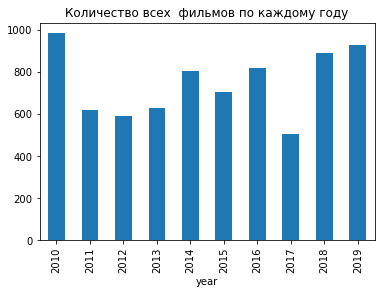

In [58]:
df.groupby('year')['title'].count().plot(kind = 'bar', title = 'Количество всех  фильмов по каждому году');

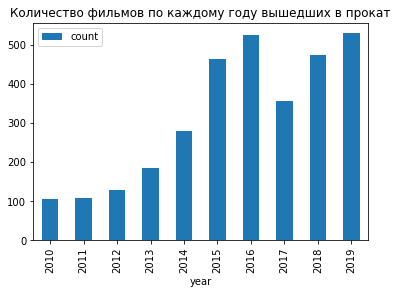

In [59]:
d.plot(kind = 'bar', x = 'year', y = 'count', title = 'Количество фильмов по каждому году вышедших в прокат');

Меньше всего выходило в прокат фильмов с 2010 по 2013. Больше всегов 2016 и 2019 годах. Всего фильмов выходило примерно поровну, но в прокат в определенные годы меньше или больше, поэтому график долей и получится похожим на график кол-во фильмов вышедших в прокат

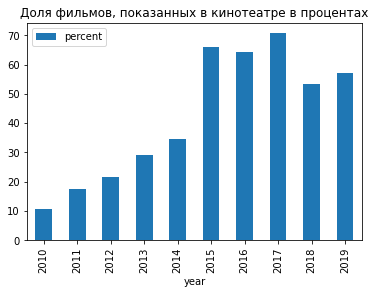

In [60]:
d.plot(kind = 'bar', x = 'year', y = 'percent', title = 'Доля фильмов, показанных в кинотеатре в процентах');

,year,sum
0,2010,2.428654e+06
1,2011,1.410276e+07
2,2012,6.955423e+06
3,2013,2.979971e+07
4,2014,7.444952e+09
5,2015,3.949737e+10
6,2016,4.786630e+10
7,2017,4.856371e+10
8,2018,4.966840e+10
9,2019,4.842571e+10


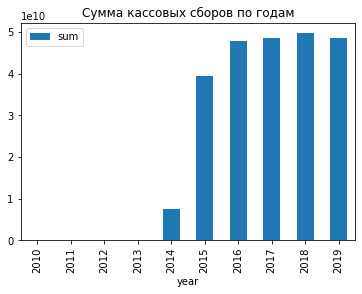

In [61]:
r = df.groupby('year')['box_office'].agg(['sum']).reset_index()
display(r)
r.plot(kind = 'bar', x = 'year', y = 'sum', title = 'Сумма кассовых сборов по годам');


Как видим, сумма сумма сборов с 2010 по 2013 близко у нуля, поэтому, если не учитывать эти годы, то меньше всего собранных средсвт было в 2014 году.

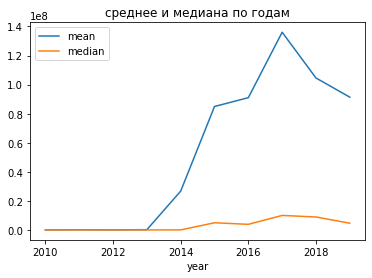

In [62]:
r = df.groupby('year')['box_office'].agg(['mean', 'median']).reset_index()

r[['year','mean', 'median']].plot(kind = 'line', x = 'year', title = 'среднее и медиана по годам');

Средняя и медиана равны нулю с 2010 по 2013 годы, однако дальше средняя начинает расти, а медиана почти не изменяется, возможно это обусловлено тем, что в эти годы выходили какие-то хиты, которые набирали огромное количество сборов, в отличие от остальных фильмов.

In [63]:
df3 = df.query('2014 < year < 2020')

In [64]:
r2 = df3.groupby(['year', 'age_restriction'])['box_office'].sum().reset_index()
r2
#r1.plot(kind = 'line', x = 'year', xlim = (2015, 2019));

,year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,3.790546e+08
1,2015,«12+» - для детей старше 12 лет,1.361608e+10
2,2015,«16+» - для детей старше 16 лет,1.136812e+10
3,2015,«18+» - запрещено для детей,5.432308e+09
4,2015,«6+» - для детей старше 6 лет,8.701799e+09
5,2016,«0+» - для любой зрительской аудитории,1.502288e+08
6,2016,«12+» - для детей старше 12 лет,1.220445e+10
7,2016,«16+» - для детей старше 16 лет,1.666455e+10
8,2016,«18+» - запрещено для детей,6.793930e+09
9,2016,«6+» - для детей старше 6 лет,1.205315e+10


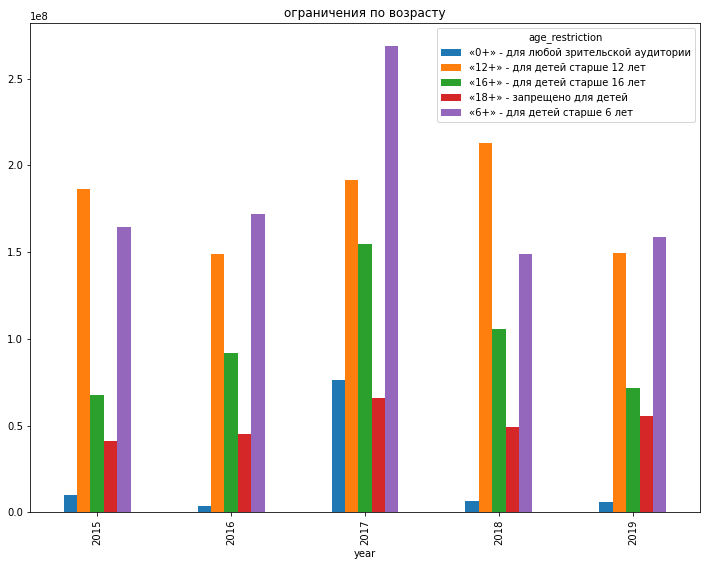

In [65]:
r3 = df3.pivot_table(index = 'year', columns = 'age_restriction', values = 'box_office')
r3.plot(kind = 'bar', figsize = (12, 9), title = 'ограничения по возрасту');

Почти в каждом годе лидируют фильмы с категорией 6+, однако в 2015 и 2018 годах более популярны были фильмы 12+. Меньше всего популярны картины 0+, причем такая тенденция сохраняется каждый год.

**Вывод: определенно возрастное ограничение влияет на сборы в кинотеатрых, наиболее популярны фильмы 6+. Количестов фильмов вышедних в принципе почти одинаково, однако в прокат фильмы выходили постепенно и с каждым годом их становилось больше.**

##  Исследуем фильмы, которые получили государственную поддержку

Посмотрим, сколько выделяют средств на поддержку кино. Проверю, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [66]:
# создадим новые столбцы с общей суммой поддержки и чистой выручки фильмов.

df4 = df.query('refundable_support.isna() == False')[['year', 'refundable_support', 'nonrefundable_support', 'ratings', 'main_genre','main_director', 'budget', 'box_office', 'age_restriction']].reset_index(drop = True)
df4['total_support'] = df4['refundable_support'] + df4['nonrefundable_support']
df4['net_profit'] = df4['box_office'] - df4['budget']

df4.head(10)


,year,refundable_support,nonrefundable_support,ratings,main_genre,main_director,budget,box_office,age_restriction,total_support,net_profit
0,2013,0.0,26500000.0,8.1,драма,А.Атанесян,79411900.0,365353.6,«16+» - для детей старше 16 лет,26500000.0,-79046546.4
1,2014,0.0,26000000.0,NaN,nan,А.Якимчук,37142857.0,28140.0,«12+» - для детей старше 12 лет,26000000.0,-37114717.0
2,2013,0.0,107847945.0,5.3,комедия,Р.Давлетьяров,176023490.0,19957031.5,«12+» - для детей старше 12 лет,107847945.0,-156066458.5
3,2014,0.0,28000000.0,4.2,драма,Е.Миндадзе (псевдоним Катя Шагалова),40574140.0,55917.5,«16+» - для детей старше 16 лет,28000000.0,-40518222.5
4,2014,0.0,25000000.0,6.4,драма,М.Угаров,40015122.0,232100.0,«16+» - для детей старше 16 лет,25000000.0,-39783022.0
5,2015,0.0,25000000.0,6.1,мультфильм,С.Серегин,51850000.0,15078858.6,«6+» - для детей старше 6 лет,25000000.0,-36771141.4
6,2015,50000000.0,100000000.0,8.5,драма,Р.Давлетьяров,220588394.0,249166767.7,«12+» - для детей старше 12 лет,150000000.0,28578373.7
7,2014,0.0,46502299.0,6.7,драма,В.Глаголева,86210067.0,4731239.5,«12+» - для детей старше 12 лет,46502299.0,-81478827.5
8,2015,0.0,75000000.0,7.0,триллер,А.Войтинский,139551503.0,352804320.4,«6+» - для детей старше 6 лет,75000000.0,213252817.4
9,2015,0.0,34000000.0,7.4,фэнтези,Д.Федоров,48571430.0,51907.5,«16+» - для детей старше 16 лет,34000000.0,-48519522.5


In [67]:
df4.year.value_counts()

2015    86
2019    70
2016    61
2018    56
2017    41
2014    16
2013     2
Name: year, dtype: int64

In [68]:
df4 = df4.query('year > 2014') # оставим фильмы, по которым имеется достаточно инфоормации.

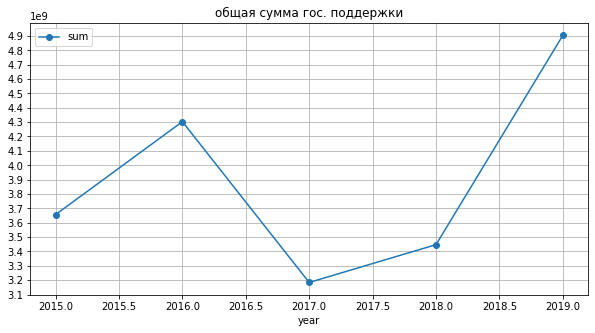

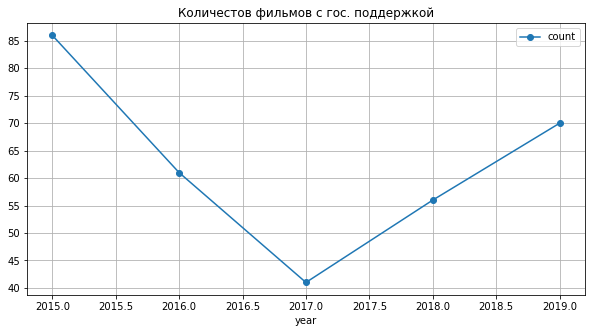

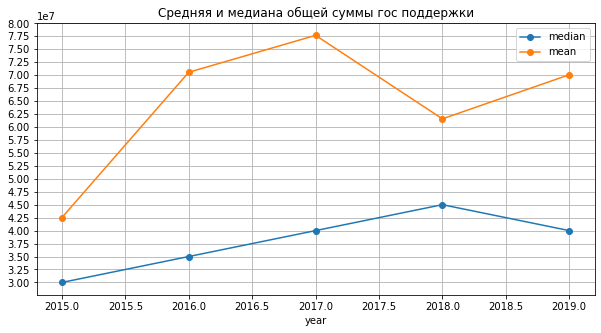

In [69]:
df4.groupby('year')['total_support'].agg(['sum']).plot(style = '-o', figsize = (10, 5), grid = True, title = 'общая сумма гос. поддержки')
plt.locator_params(axis='y', nbins= 25 )
plt.show()

df4.groupby('year')['total_support'].agg(['count']).plot(style = '-o', figsize = (10, 5), grid = True, title = 'Количестов фильмов с гос. поддержкой');
plt.locator_params(axis='y', nbins= 15 )
plt.show()

df4.groupby('year')['total_support'].agg(['median', 'mean']).plot(grid = True, style = 'o-', figsize = (10, 5), title = 'Средняя и медиана общей суммы гос поддержки' )
plt.locator_params(axis='y', nbins= 25 )
plt.show()

В 2017 видим падение количества фильмов с гос. поддержкой, как и общая сумма средств поддержки. Хотя средняя и медиана в этото год только шла на увеличение.

построим такие же графики для рейтингов фильмов 

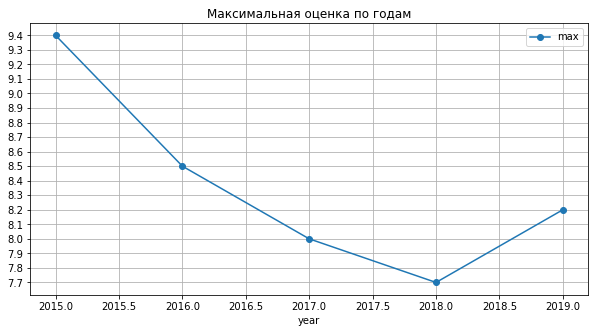

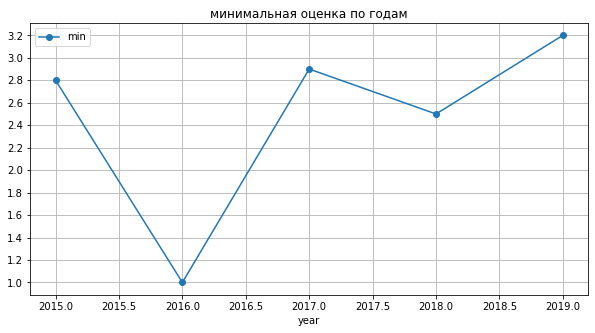

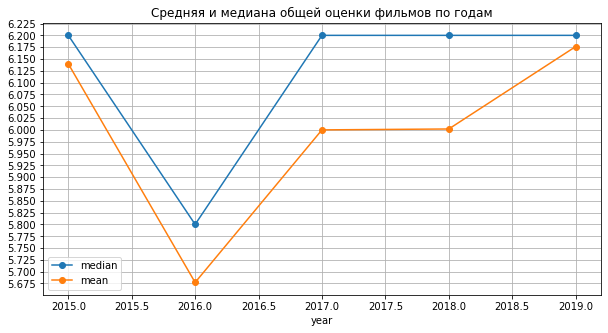

In [70]:
df4.groupby('year')['ratings'].agg(['max']).plot(style = '-o', figsize = (10, 5), grid = True, title = 'Максимальная оценка по годам')
plt.locator_params(axis='y', nbins= 25 )
plt.show()

df4.groupby('year')['ratings'].agg(['min']).plot(style = '-o', figsize = (10, 5), grid = True, title = 'минимальная оценка по годам');
plt.locator_params(axis='y', nbins= 15 )
plt.show()

df4.groupby('year')['ratings'].agg(['median', 'mean']).plot(grid = True, style = 'o-', figsize = (10, 5), title = 'Средняя и медиана общей оценки фильмов по годам' )
plt.locator_params(axis='y', nbins= 25 )
plt.show()

Видим, что максимальная оценка снижалась по годам до 2018, а потом начала расти. Самая минимальная оценка была в 2016 году, что и повлияло на медиану и среднюю на графиках. В основном рейтинги с среденм равны примерно 6-6.2

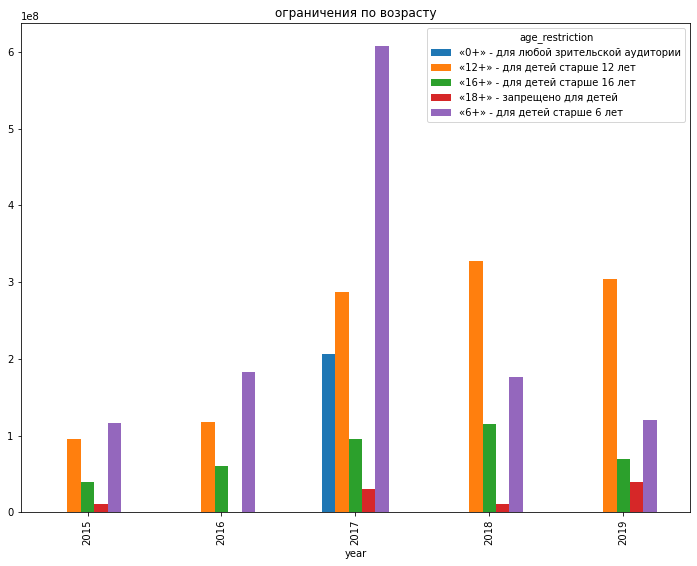

In [71]:
r3 = df4.pivot_table(index = 'year', columns = 'age_restriction', values = 'box_office')
r3.plot(kind = 'bar', figsize = (12, 9), title = 'ограничения по возрасту');

Наиболе популярны фильмы 12+, однако в 2017 это место заняли фильмы6+, возможно вышел какой-нибудь хит, как и в 2014 году.

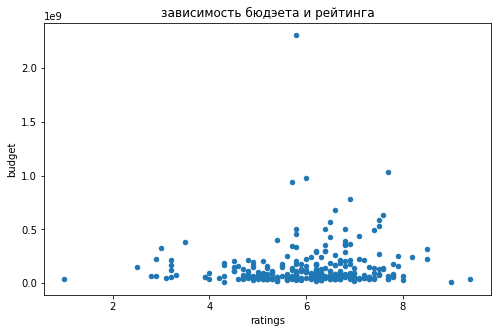

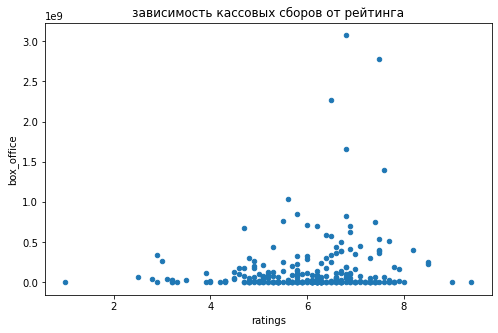

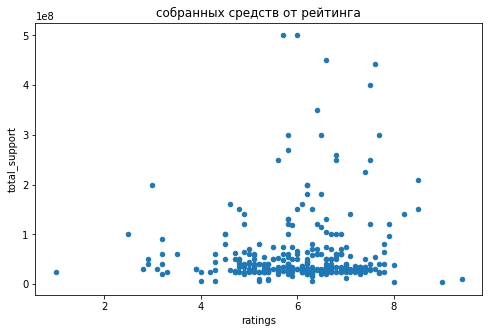

In [72]:
df4.plot(x = 'ratings', y = 'budget', kind = 'scatter', figsize = (8, 5), title = 'зависимость бюдэета и рейтинга');
df4.plot(x = 'ratings', y = 'box_office', kind = 'scatter', figsize = (8, 5), title = 'зависимость кассовых сборов от рейтинга');
df4.plot(x = 'ratings', y = 'total_support', kind = 'scatter', figsize = (8, 5), title = 'собранных средств от рейтинга');

Определенной зависимости на графиках не видно. фильмы получают различные рейтинги независимо от собранных средств, кассовых сборов или бюджета.

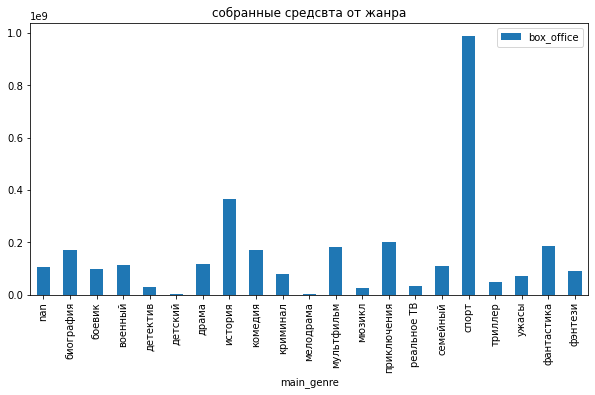

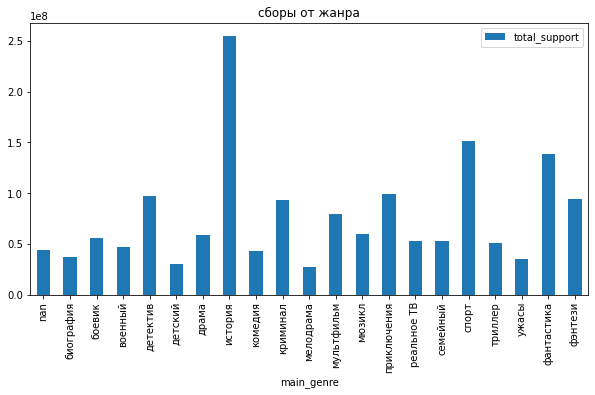

In [73]:
df4.pivot_table(index = 'main_genre', values = 'box_office').plot(kind = 'bar', figsize = (10, 5), title = 'собранные средсвта от жанра');
df4.pivot_table(index = 'main_genre', values = 'total_support').plot(kind = 'bar', figsize = (10, 5), title = 'сборы от жанра');
#df4.pivot_table(index = 'main_director', values = 'box_office').plot(kind = 'bar', figsize = (10, 5))

Больше всего сборов получают фильмы с жанром спорт, они сильно выделяются. Меньше всего детсвие и мелодраммы.
Бюджетом поддерживают фильмы с жанром история, причем намного активнее, чем другие.

In [74]:
df4.groupby('main_director')['total_support'].agg(['sum', 'count']).sort_values(by = 'sum', ascending = False)

,sum,count
main_director,,
Ф.Бондарчук,750000000.0,2
Н.Хомерики,660000000.0,3
А.Кравчук,500000000.0,1
А.Мизгирев,450000000.0,1
Н.Лебедев,442104482.0,1
...,...,...
А.Сурикова,10000000.0,1
Е.Жигаева,8000000.0,1
Е.Константинова (псевдоним Алена Званцева),5000000.0,1


Нет автора, которые встречается большое количестов раз, поэтому построить график не сможем. 
Бондарчук получил больше всего средств поддержки, снял всего две картины. 

In [75]:
df4

,year,refundable_support,nonrefundable_support,ratings,main_genre,main_director,budget,box_office,age_restriction,total_support,net_profit
5,2015,0.0,25000000.0,6.1,мультфильм,С.Серегин,51850000.0,1.507886e+07,«6+» - для детей старше 6 лет,25000000.0,-3.677114e+07
6,2015,50000000.0,100000000.0,8.5,драма,Р.Давлетьяров,220588394.0,2.491668e+08,«12+» - для детей старше 12 лет,150000000.0,2.857837e+07
8,2015,0.0,75000000.0,7.0,триллер,А.Войтинский,139551503.0,3.528043e+08,«6+» - для детей старше 6 лет,75000000.0,2.132528e+08
9,2015,0.0,34000000.0,7.4,фэнтези,Д.Федоров,48571430.0,5.190750e+04,«16+» - для детей старше 16 лет,34000000.0,-4.851952e+07
16,2015,0.0,75000000.0,6.6,драма,Р.Прыгунов,75000000.0,4.461635e+08,«16+» - для детей старше 16 лет,75000000.0,3.711635e+08
...,...,...,...,...,...,...,...,...,...,...,...
327,2019,100000000.0,400000000.0,6.0,история,А.Кравчук,980000000.0,7.177032e+08,«12+» - для детей старше 12 лет,500000000.0,-2.622968e+08
328,2019,100000000.0,0.0,6.7,мультфильм,Д.Шмидт,190000000.0,5.010692e+08,«6+» - для детей старше 6 лет,100000000.0,3.110692e+08
329,2019,100000000.0,400000000.0,5.7,фантастика,Ф.Бондарчук,944000000.0,NaN,«12+» - для детей старше 12 лет,500000000.0,NaN
330,2019,0.0,30000000.0,5.9,драма,И.Северов,46154000.0,NaN,«12+» - для детей старше 12 лет,30000000.0,NaN


year
2015   -1.911385e+09
2016   -1.454529e+09
2017    3.913503e+09
2018    2.933405e+09
2019   -2.825446e+09
Name: net_profit, dtype: float64

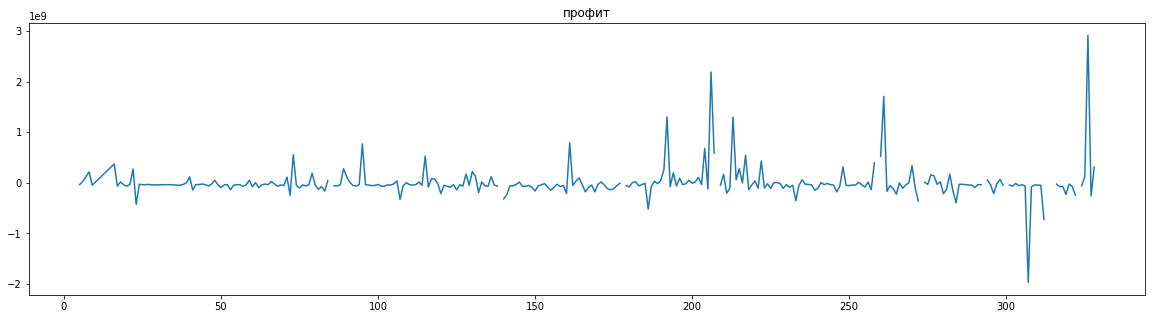

In [76]:
df4['net_profit'].plot(figsize = (20, 5), title = 'профит');
df4.groupby('year')['net_profit'].sum()

In [77]:
df4.describe()

,year,refundable_support,nonrefundable_support,ratings,budget,box_office,total_support,net_profit
count,314.000000,3.140000e+02,3.140000e+02,299.000000,3.140000e+02,3.000000e+02,3.140000e+02,3.000000e+02
mean,2016.882166,1.231847e+07,4.976541e+07,6.017057,1.339946e+08,1.369192e+08,6.208388e+07,2.185159e+06
std,1.534107,2.545318e+07,6.131912e+07,1.156312,1.914017e+08,3.431853e+08,7.439304e+07,3.242715e+08
min,2015.000000,0.000000e+00,0.000000e+00,1.000000,6.000000e+06,1.550000e+03,3.000000e+06,-1.971477e+09
25%,2015.000000,0.000000e+00,2.500000e+07,5.300000,4.615392e+07,1.280142e+06,2.560000e+07,-7.113259e+07
50%,2017.000000,0.000000e+00,3.000000e+07,6.200000,7.091132e+07,1.673371e+07,3.500000e+07,-4.125415e+07
75%,2018.000000,1.500000e+07,4.412500e+07,6.700000,1.500064e+08,1.086893e+08,6.000000e+07,4.143373e+05
max,2019.000000,1.800000e+08,4.000000e+08,9.400000,2.305074e+09,3.073569e+09,5.000000e+08,2.913569e+09


**Вывод: доля фильмов вышедших в прокат с каждым годом все больше увеличивается. Больше всего собирают фильмы 12+, про спорт или историю. Бюджет, средства поддержки не сильно влияют на рейтинги фильмов. Каждый год выходят большое количество фильмов, причем сумма сборов за них может получится и отрицательной.**

Видно, что много фильмов ушло в минус и не окупились. И в некоторые годы эти фильмы не окупаются. Только в 2017 и 2018 годах общая прибыль была положительной.

**Общий вывод:**

* В данных были исправлены ошибки: пробелы в начале и строке значений строк в столбцах, различное наименование или вообще ошибки в наименовании стран, так же порядок был отсортирован, чтобы не было неявных дубликатов, рейтинги были написаны разными типами: в процентах и вещесвтенным числом, все было приведено ко второму типу. В некоторых строках бюдджет был равен нулю, такие значения заменили на сумму полной поддержки. 

* Были добавлены новые столбцы: главный режжисер, год показа фильма, отношение общей поддержки к бюджету и главного жанра фильма.

* Больше всего фильмов вышло в прокат в 2019 - 530, а меньше всего в 2010 - всего 105. Было выявлено, что каждый год в прокат выходили определенные хиты, которые выбивали значение среднего и помогали уйти в плюс общей сумме сборов. Фильмы 6+, вышедшие в прокат собирают больше всего. 0+ - меньше всего.

* Фильмов получивших госю поддержку немного. Анализировали только с 2014 года и далее. в 2017 году общая сумма гос. поддержки была минимальной, как и количестов фильмов в этом году. Однако значени медианы и среднего по сумме гос. поддержки с кадым годом только возрастали. Максимальльнаяя оценка с каждым годом только уменьшалась, после 2018 начала расти. В 2016 году вышел фильм с самым низким рейтингом - 1. По другим годам средняя и медиана оценок составляет от 6 до 6.2. С 2014 по 2017 больше всего собирали фильмы 6+, после - 12+. Было выявлено, что ни буджет, ни сборы, ни поддержка не влияют на рейтинг фильма. Гос поддержка выделялась на фильмы в основном про историю. А максимальнаые сборы получали фильмы про спорт. Бондарчук получил больше всего средств поддержки на свои два фильма. Каждый год снимаются фильмы, и редко можно увидеть, что общие сборы отрицательны, так не было только в 2017 и 2018 годах.